In [396]:
#Importing all the nessacary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [397]:
#Uploading the data
df=pd.read_csv("loan.csv")
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved


In [400]:
#checking for the missing values
df.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [401]:
#checking for any duplicates
df.duplicated().sum()

0

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


## getting the info abt the data

In [407]:
df.nunique()

age                32
gender              2
occupation         38
education_level     5
marital_status      2
income             40
credit_score       28
loan_status         2
dtype: int64

In [409]:
#statistical info
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [411]:
#cheching for the column names
df.columns


Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

In [413]:
#Transforming the gender column into male-->0 and female-->1
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['gender'] = df['gender'].astype(float)

In [415]:
#ENCODING THE CATEGORIACAL VARIABLES
label_encoder=LabelEncoder()
#creating a column for encoded education level

df['education_level_encoded'] = label_encoder.fit_transform(df['education_level'])
#df.drop(columns=['education_level'], inplace=True)
df.drop(columns=['education_level'], inplace=True)

In [417]:
#Checking the updated structure
df.head()

,age,gender,occupation,marital_status,income,credit_score,loan_status,education_level_encoded
0,32,0.0,Engineer,Married,85000,720,Approved,1
1,45,1.0,Teacher,Single,62000,680,Approved,4
2,28,0.0,Student,Single,25000,590,Denied,3
3,51,1.0,Manager,Married,105000,780,Approved,1
4,36,0.0,Accountant,Married,75000,710,Approved,1


In [419]:
#Encoding the Occupation column
df['occupation_encoded']=label_encoder.fit_transform(df['occupation'])
df.drop(columns=['occupation'],inplace=True)

In [421]:
df

,age,gender,marital_status,income,credit_score,loan_status,education_level_encoded,occupation_encoded
0,32,0.0,Married,85000,720,Approved,1,12
1,45,1.0,Single,62000,680,Approved,4,35
2,28,0.0,Single,25000,590,Denied,3,33
3,51,1.0,Married,105000,780,Approved,1,16
4,36,0.0,Married,75000,710,Approved,1,0
...,...,...,...,...,...,...,...,...
56,39,0.0,Married,100000,770,Approved,4,2
57,25,1.0,Single,32000,570,Denied,3,27
58,43,0.0,Married,95000,760,Approved,1,4
59,30,1.0,Single,55000,650,Approved,4,37


In [423]:
#Ecoding  the Marital Status
df['marital_status_encode']=label_encoder.fit_transform(df['marital_status'])
df.drop(columns='marital_status',inplace=True)

In [424]:
#ENCODING THE LOAN STATUS
df['loan_status_encoded']=label_encoder.fit_transform(df['loan_status'])
#dropping the original column
df.drop(columns='loan_status',inplace=True)

In [427]:
#Checking for the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      61 non-null     int64  
 1   gender                   61 non-null     float64
 2   income                   61 non-null     int64  
 3   credit_score             61 non-null     int64  
 4   education_level_encoded  61 non-null     int32  
 5   occupation_encoded       61 non-null     int32  
 6   marital_status_encode    61 non-null     int32  
 7   loan_status_encoded      61 non-null     int32  
dtypes: float64(1), int32(4), int64(3)
memory usage: 3.0 KB


In [429]:
#Statistical information
df.describe()

,age,gender,income,credit_score,education_level_encoded,occupation_encoded,marital_status_encode,loan_status_encoded
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,37.081967,0.491803,78983.606557,709.836066,2.032787,16.754098,0.393443,0.262295
std,8.424755,0.504082,33772.025802,72.674888,1.378008,11.062935,0.492568,0.443533
min,24.000000,0.000000,25000.000000,560.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,52000.000000,650.000000,1.000000,8.000000,0.000000,0.000000
50%,36.000000,0.000000,78000.000000,720.000000,2.000000,15.000000,0.000000,0.000000
75%,43.000000,1.000000,98000.000000,770.000000,3.000000,26.000000,1.000000,1.000000
max,55.000000,1.000000,180000.000000,830.000000,4.000000,37.000000,1.000000,1.000000


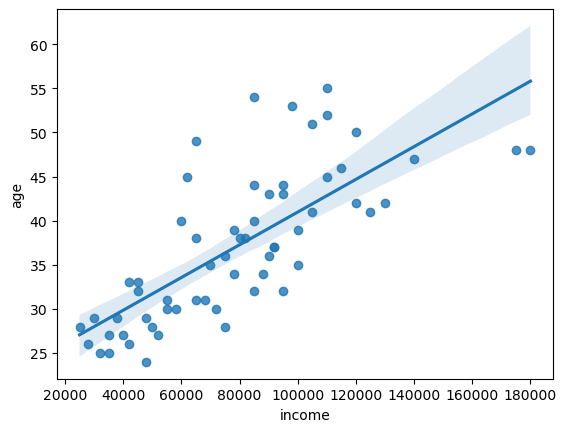

In [431]:
#Regression plot of 
sns.regplot(x="income", y="age",data=df);

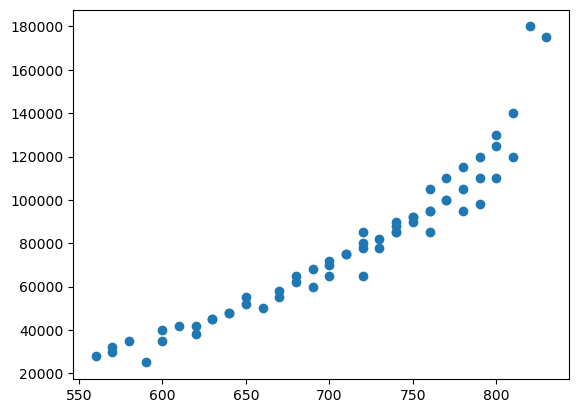

In [433]:
plt.scatter(x='credit_score',y='income',data=df)
plt.show()

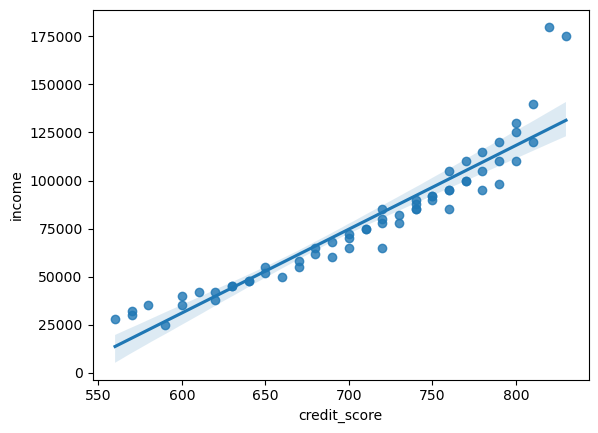

In [435]:
#Regression plot of 
sns.regplot(x="credit_score", y="income",data=df);

In [437]:
df.corr()

,age,gender,income,credit_score,education_level_encoded,occupation_encoded,marital_status_encode,loan_status_encoded
age,1.000000,0.049218,0.743184,0.806042,0.197880,-0.236898,-0.746899,-0.648135
gender,0.049218,1.000000,-0.051406,-0.111500,0.024387,0.252175,0.281703,0.233413
income,0.743184,-0.051406,1.000000,0.937983,0.164035,-0.342652,-0.752035,-0.699577
credit_score,0.806042,-0.111500,0.937983,1.000000,0.149835,-0.347896,-0.845532,-0.820765
education_level_encoded,0.197880,0.024387,0.164035,0.149835,1.000000,0.109864,-0.043876,-0.232458
occupation_encoded,-0.236898,0.252175,-0.342652,-0.347896,0.109864,1.000000,0.397308,0.271510
marital_status_encode,-0.746899,0.281703,-0.752035,-0.845532,-0.043876,0.397308,1.000000,0.740370
loan_status_encoded,-0.648135,0.233413,-0.699577,-0.820765,-0.232458,0.271510,0.740370,1.000000


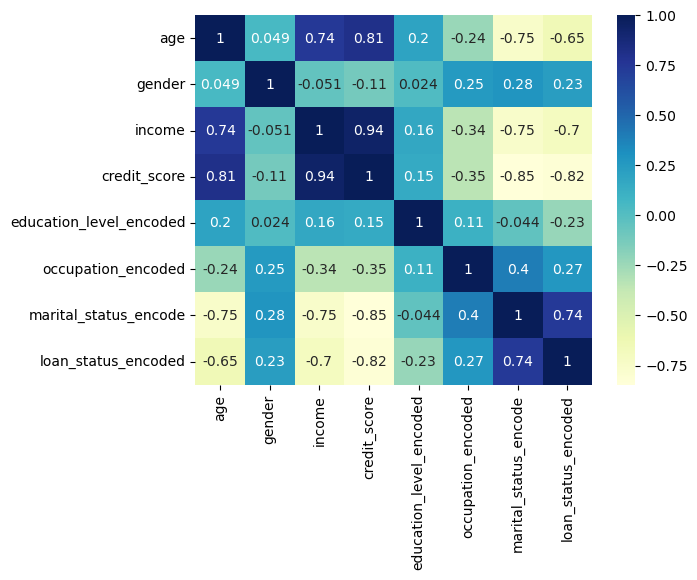

In [439]:
 #Making a heatmap
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [441]:
#Assigning the predictor and the ptarget
y=df['loan_status_encoded']
x=df.drop(['loan_status_encoded'],axis=1)

## standardizing the data  

In [444]:
#Calling the scaler object
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

## Building the model

In [447]:
#Splitting the data 
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [449]:
#Training the model
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [450]:
#Testing the data using the test
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [453]:
y_test

26    0
35    0
60    0
28    0
11    0
2     1
34    1
59    0
40    0
22    0
4     0
10    0
30    1
Name: loan_status_encoded, dtype: int32

## model evaluation

In [458]:
#Measuring the accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy: .2f}") 

Accuracy: 1.00


In [466]:
#Measuring the classification reportion report 
classification=classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

